# Rebecca Hinrichs
###### DATA 3401 -- Homework 4 -- due 19 Mar 2022
## Random Forest Exercise

## *** Import Libraries ***

In [1]:
# Import the usual libraries for pandas and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# and read in the data, loan_data.csv, as a dataframe called df_loans.
df_loans = pd.read_csv('loan_data.csv')

In [74]:
# Check out the info() method on loans.
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [75]:
# Check out the head() method on loans.
df_loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [76]:
# Check out the describe() method on loans.
df_loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

## *** Exploratory Data Analysis ***

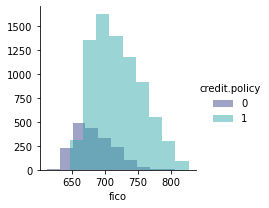

In [77]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy
# outcome. Note: This maybe pretty tricky, feel free to contact me if you need help. You will probably
# need one line of code for each histogram. Also, I recommend you just use pandas built in .hist().
creditworthy = sns.FacetGrid(df_loans, hue='credit.policy', palette='mako')
creditworthy.map(plt.hist, 'fico', alpha=0.5).add_legend()
plt.show()

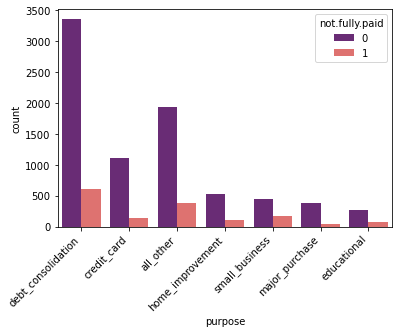

In [78]:
# Create a countplot using seaborn and show the counts of loans by purpose, with the color
# hue defined by not.fully.paid.
loan_counts = sns.countplot(x='purpose', hue='not.fully.paid', palette='magma', data=df_loans)
loan_counts.set_xticklabels(loan_counts.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

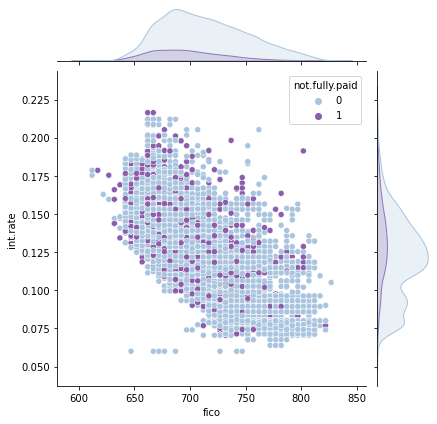

In [79]:
# Check and explain the trend between FICO score and interest rate by creating a joinplot.
sns.jointplot(data=df_loans, x='fico', y='int.rate', hue='not.fully.paid', palette='BuPu')
plt.show()

It appears that the higher the FICO score, the lower the interest rate. Adversely, the lower the FICO score, the higher the interest rate. Carrying a balance does not seem to have a strong correlation between FICO score or interest rate, but it does appear to be less common for higher FICO scores and lower interest rates to not carry a balance (i.e. 'not.fully.paid == 0').

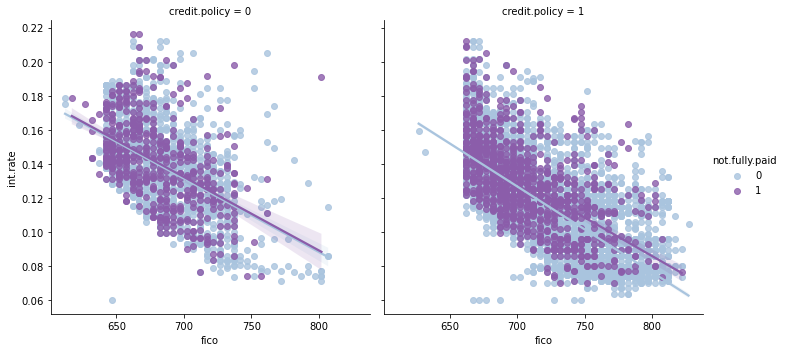

In [80]:
# Create a lmplots to see if the trend differed between ‘not.fully.paid’ and ‘credit.policy’. Check
# the documentation for lmplot() if you can’t figure out how to separate it into columns.
sns.lmplot(x='fico', y='int.rate', hue='not.fully.paid', col='credit.policy', 
           data=df_loans, palette='BuPu')
plt.show()

### *** Set up the Data for the Random Forest Classification Model ***

In [81]:
# First, check .info() again
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### *** Categorical Features ***

In [102]:
# So you need to transform the ['purpose' columns] using dummy variables so sklearn will be able to 
# understand them. Do this in one clean step using pd.get_dummies.
loan_purpose = pd.get_dummies(df_loans['purpose'], drop_first=True)
loan_purpose

credit_card  debt_consolidation  educational  home_improvement  \
0               0                   1            0                 0   
1               1                   0            0                 0   
2               0                   1            0                 0   
3               0                   1            0                 0   
4               1                   0            0                 0   
...           ...                 ...          ...               ...   
9573            0                   0            0                 0   
9574            0                   0            0                 0   
9575            0                   1            0                 0   
9576            0                   0            0                 1   
9577            0                   1            0                 0   

      major_purchase  small_business  
0                  0               0  
1                  0               0  
2                  0               0  
3                  0               0  
4                  0               0  
...              ...             ...  
9573               0               0  
9574               0               0  
9575               0               0  
9576               0               0  
9577               0               0  

[9578 rows x 6 columns]

In [101]:
# Create a list of 1 element containing the string ‘purpose’. Call this list cat_feats.
cat_feats = ['purpose']
cat_feats

['purpose']

In [103]:
# Now use pd.get_dummies(df_loans, columns=cat_feats, drop_first=True) to create a fixed
# larger dataframe that has new feature columns with dummy variables. Set this dataframe as
# final_data.
final_data = pd.get_dummies(df_loans, columns=cat_feats, drop_first=True)
final_data

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purpose_credit_card  \
0           0               0                    0   
1           0               0                    1   
2           0               0                    0   
3           0               0                    0   
4           0               0                    1   
...       ...             ...                  ...   
9573        0               1                    0   
9574        0               1                    0   
9575        0               1                    0   
9576        0               1                    0   
9577        0               1                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   
9577                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9573                         0                       0                       0  
9574                         0                       0                       0  
9575                         0                       0                       0  
9576        

In [116]:
# convert values to like data types
for i in final_data.columns:
    final_data[i] = final_data[i].astype(float)
# confirm clean data & column names
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   float64
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   float64
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   float64
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   float64
 10  delinq.2yrs                 9578 non-null   float64
 11  pub.rec                     9578 non-null   float64
 12  not.fully.paid              9578 non-null   float64
 13  purpose_credit_card         9578 

#### *** Train Test Split ***

In [117]:
# Use sklearn to split the data into a training set and a testing set.
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### *** Training a Decision Tree Model ***

In [118]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [120]:
# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### *** Predictions and Evaluation of Decision Tree ***

In [121]:
# Create predictions from the test set and create a classification report 
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      2416
         1.0       0.21      0.23      0.22       458

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874



In [123]:
# and a confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[2026  390]
 [ 354  104]]


In [125]:
# visualize the decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydot
import six
from six import StringIO
import sys
sys.modules['sklearn.externals.six'] = six
features = list(final_data.columns[1:])
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#### *** Training the Random Forest model ***

In [128]:
# Create an instance of the RandomForestClassifier class and fit it to our training data from
# the previous step.
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier(n_estimators=100)
randforest.fit(X_train, y_train)

RandomForestClassifier()

#### *** Predictions and Evaluation ***

In [129]:
# Predict the class of ‘not.fully.paid’ for the X_test data.
rf_predictions = randforest.predict(X_test)

In [132]:
# Finally create a classification report from the results.
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2416
         1.0       0.41      0.02      0.05       458

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



In [ ]:
# Did you get anything strange or some sort of warning?

Not at all. However I made all the data a uniform type before analysis, did that help?

In [133]:
# Show the Confusion Matrix for the predictions.
print(confusion_matrix(y_test, rf_predictions))

[[2400   16]
 [ 447   11]]


In [ ]:
# What performed better the random forest or the decision tree?

With larger data, random forest performs better than decision tree. Our rate of True Positive is significantly higher, however our rate of False Negative is also significantly higher. Overall, we have far less False Positive and True Negative values. This indicates our accuracy- which has an f1-score of 84%- has improved with the random forest model over the decision tree's 74% f1-score. With individual testing, the decision tree would perform well.